Accuracy: 0.9000
Precision: 0.9222
Recall: 0.8646
F1 Score: 0.8925
AUC-ROC: 0.9465
Confusion Matrix:
[[97  7]
 [13 83]]


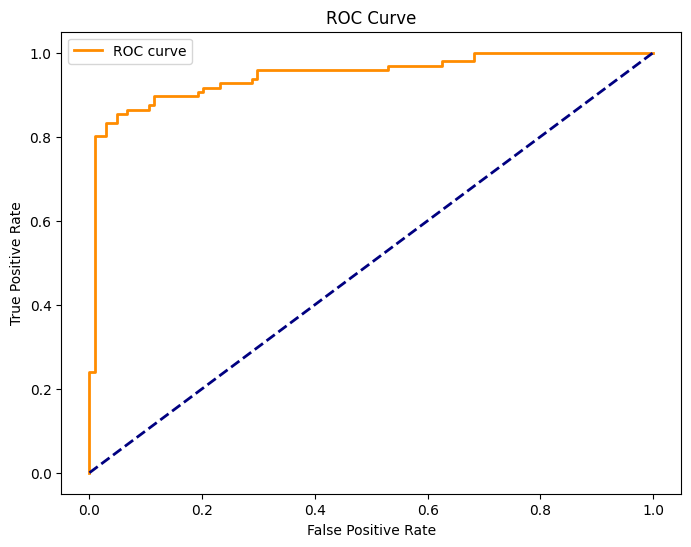

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Згенеруємо набір даних для бінарної класифікації
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Розділімо дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Навчаємо логістичну регресію
model = LogisticRegression()
model.fit(X_train, y_train)

# Зробимо прогнози на тестовому наборі
y_pred = model.predict(X_test)

# Оцінка ефективності класифікатора
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Виведемо метрики
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {roc_auc:.4f}')

# Побудуємо матрицю плутанини
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Побудуємо ROC-криву
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Згенеруємо набір даних для мультикласової класифікації
X_multi, y_multi = make_classification(n_samples=1000, n_features=2, n_classes=3, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Розділімо дані на навчальний та тестовий набори
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Навчаємо класифікатори
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
svc_classifier = SVC(kernel='linear', C=1, random_state=42)

rf_classifier.fit(X_train_multi, y_train_multi)
svc_classifier.fit(X_train_multi, y_train_multi)

# Зробимо прогнози на тестовому наборі
y_pred_rf = rf_classifier.predict(X_test_multi)
y_pred_svc = svc_classifier.predict(X_test_multi)

# Оцінка ефективності класифікаторів
accuracy_rf = accuracy_score(y_test_multi, y_pred_rf)
precision_rf = precision_score(y_test_multi, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test_multi, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test_multi, y_pred_rf, average='weighted')

accuracy_svc = accuracy_score(y_test_multi, y_pred_svc)
precision_svc = precision_score(y_test_multi, y_pred_svc, average='weighted')
recall_svc = recall_score(y_test_multi, y_pred_svc, average='weighted')
f1_svc = f1_score(y_test_multi, y_pred_svc, average='weighted')

# Виведемо метрики для Random Forest Classifier
print("Random Forest Classifier:")
print(f'Accuracy: {accuracy_rf:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')
print(f'F1 Score: {f1_rf:.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test_multi, y_pred_rf))

# Виведемо метрики для Support Vector Classifier
print("\nSupport Vector Classifier:")
print(f'Accuracy: {accuracy_svc:.4f}')
print(f'Precision: {precision_svc:.4f}')
print(f'Recall: {recall_svc:.4f}')
print(f'F1 Score: {f1_svc:.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test_multi, y_pred_svc))


Random Forest Classifier:
Accuracy: 0.9050
Precision: 0.9056
Recall: 0.9050
F1 Score: 0.9048
Confusion Matrix:
[[59  3  5]
 [ 8 49  0]
 [ 2  1 73]]

Support Vector Classifier:
Accuracy: 0.8600
Precision: 0.8643
Recall: 0.8600
F1 Score: 0.8602
Confusion Matrix:
[[57  2  8]
 [12 45  0]
 [ 4  2 70]]
